In [2932]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, ticker

In [3133]:
class variables:
    n = 30
    
    def __init__(self,gamma,epsilon,Av,w,I_0,depth,kw,kc,kn,mu,alpha, tau, N_b, count, H_i):
         
         # gamma
        self.gamma = gamma
        
        
        # epsilon
        self.epsilon = epsilon
            
            
         # diffusivity
        self.Av = Av    # meters per second

         # verticle settling
        self.w = w   # meters per day

         #incident light
        self.I_0 = I_0  # umol photons m-2 s-1

         # depth
        self.depth = depth    # meters


         # background turbidity
        self.kw = kw  #m-1


         # specific light attenuation of phytoplankton
        self.kc = kc
     

         # H_N half saturation constatn for nutrient limiting
        self.kn = kn


         # m specific loss rate
        self.mu = mu
        
        # alpha = 
        self.alpha = alpha
        
        
        # tau
        self.tau = tau
        
        
        # N-h
        self.N_b = N_b
        
        # count
        self.count = count
        
        
        # H_i
        self.H_i = H_i
        
        # size of each depth grid
    def delta_z(self):
        grids = self.depth / self.n
        return grids

In [3206]:
                  # gamma   epsilon   Av m/day  w m/day    I_0     depth     kw      kc        kn      mu    alpha     tau    N-b  count     H_i
param = variables( 1.5,     0.03,      10,        1.5,    200,    300,     0.03,   6e-10,    0.03,    0.5,   1e-9 ,   0.02,    50,     0,      30)


# I0 - annual solar mean radiance
# kw - light penetration lenght scales
# kc - attenuation coefficient of phytoplankton
# mu - maximum specific growth rate
# alpha - initial slope of PI curve 
# kn - half saturation constant for nitrogen
# epsilon - phytoplankton mortality
# gamma  - zooplankton quadratic grazing parameter
# Av - verticle diffusivities 
# w - verticle remineralization length    m day-1
# N-h - Nutrients at bottom height -h mmols N m-3

In [3207]:
param.__dict__

{'gamma': 1.5,
 'epsilon': 0.03,
 'Av': 10,
 'w': 1.5,
 'I_0': 200,
 'depth': 300,
 'kw': 0.03,
 'kc': 6e-10,
 'kn': 0.03,
 'mu': 0.5,
 'alpha': 1e-09,
 'tau': 0.02,
 'N_b': 50,
 'count': 0,
 'H_i': 30}

In [3208]:
# depth_grid 
def depth_grid(param):
    z = np.arange((0.5 * param.delta_z()),(param.depth - 0.5* param.delta_z())+ param.delta_z(), param.delta_z())
    return z

z = depth_grid(param)
z

array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.,
       115., 125., 135., 145., 155., 165., 175., 185., 195., 205., 215.,
       225., 235., 245., 255., 265., 275., 285., 295.])

In [3209]:
D_z = np.arange(1,16,1)
D_z

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [3210]:
## diffusion of phytoplankton

# advection flux
j_a = np.zeros(param.n + 1)

# diffusion flux
j_d = np.zeros(param.n + 1)

# total flux
j = np.zeros(param.n + 1)


# dp/dt
dp_dt = np.zeros(param.n)



## diffusion of nutrients

j_an = np.zeros(param.n + 1)

j_dn = np.zeros(param.n +1)

j_n = np.zeros(param.n +1)



dN_dt = np.zeros(param.n)


# advection and diffusion of Detritus

j_a_det = np.zeros(param.n +1)

j_d_det = np.zeros(param.n + 1)

j_det = np.zeros(param.n + 1)


# dD_dt
dD_dt = np.zeros(param.n)
dD_dt

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3211]:
y = np.ones(param.n*3)

p = y[0:param.n]
N = y[param.n:param.n*2]
det = y[param.n*2:]


#p = (10**10 * param.alpha) * np.exp(-(z - param.depth/10)**(2/1000))
N = param.N_b * np.exp(-(z - param.depth/1.8)**2/500)


for i in range(len(p)):
    p[i] = p[i] * 0.1
    N[i] = N[i] * 5
    det[i] = det[i] * 0

p[0] = 0
N[0] = 0
p[param.n-1]= 0
N[param.n-1] = 0
det[0] = 0
det[param.n-1] = 0

p
#N
#det


array([0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0. ])

## Time steps

In [3228]:
t = (0,2000)
t

(0, 2000)

In [3213]:
#def seasons(param):
#    param.count = 

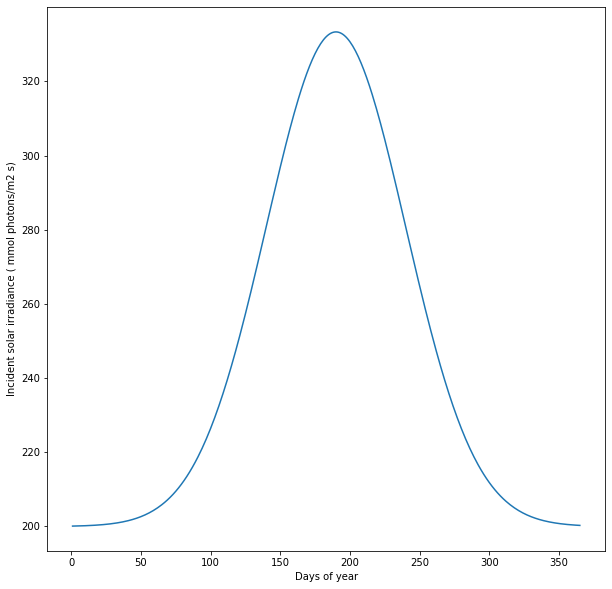

In [3214]:
x_values = np.linspace(1,365,365)

def gaussian_light(x, mu, sig):
    lt = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    tlt = param.I_0 + (param.I_0 * lt)/1.5
    return tlt


plt.plot(x_values, gaussian(x_values,190,50)) 
plt.xlabel('Days of year')
plt.ylabel('Incident solar irradiance ( mmol photons/m2 s)')
plt.savefig('/users/manasi/Documents/dtu/course_content/seasonal_light.png')

In [3215]:
x_values = np.linspace(1,365,365)

L = gaussian_light(x_values,190,80)

def calc_light(p,det,param):
    
    n_zt = np.zeros(param.n)
            
    n_zt = np.cumsum(p + det) * param.delta_z() * param.kc 
    
    I_zt = param.I_0 * (1 + np.cos((2* np.pi * param.count)/365)) * (np.e**(-param.kw * z - n_zt))            
    param.count += 1
    return I_zt

In [3216]:
I_zt = calc_light(p,det,param)
I_zt

array([3.44283191e+02, 2.55051260e+02, 1.88946621e+02, 1.39975099e+02,
       1.03696104e+02, 7.68199632e+01, 5.69096284e+01, 4.21596896e+01,
       3.12326663e+01, 2.31377282e+01, 1.71408506e+01, 1.26982545e+01,
       9.40709827e+00, 6.96894980e+00, 5.16272499e+00, 3.82464074e+00,
       2.83336354e+00, 2.09900734e+00, 1.55498288e+00, 1.15195965e+00,
       8.53392698e-01, 6.32208860e-01, 4.68351842e-01, 3.46963578e-01,
       2.57036940e-01, 1.90417649e-01, 1.41064864e-01, 1.04503421e-01,
       7.74180385e-02, 5.73526935e-02])

In [3217]:
def calc_sigma_n(N,param):
    
    sigma_n = np.zeros(param.n)  
    sigma_n = N/(param.kn + N)
    
    return sigma_n

In [3218]:
calc_sigma_n(N,param)

array([0.00000000e+00, 8.72689678e-17, 3.08120646e-14, 7.29229061e-12,
       1.15688274e-09, 1.23025991e-07, 8.76966302e-06, 4.18867593e-04,
       1.32441059e-02, 2.23705169e-01, 8.05724287e-01, 9.75615715e-01,
       9.96149892e-01, 9.99109168e-01, 9.99693238e-01, 9.99842479e-01,
       9.99879346e-01, 9.99862139e-01, 9.99765025e-01, 9.99402682e-01,
       9.97737749e-01, 9.87330366e-01, 9.02248661e-01, 4.22902378e-01,
       3.75357393e-02, 1.38933919e-03, 3.32683740e-05, 5.33288150e-07,
       5.73007770e-09, 0.00000000e+00])

In [3219]:
def calc_sigma_l(I_zt,param):
    
    sigma_l = np.zeros(param.n)
    
    sigma_l = I_zt/(param.H_i + I_zt)
    #sigma_l = (param.alpha * I_zt)/(np.sqrt(param.mu**2 + (param.alpha**2 * I_zt**2)))
        
    return sigma_l
        
calc_sigma_l(I_zt,param)

array([0.91984679, 0.89475577, 0.8629803 , 0.82350356, 0.77561051,
       0.71915362, 0.65481385, 0.58425542, 0.51006543, 0.43542938,
       0.36360928, 0.29739517, 0.23871583, 0.18850819, 0.1468238 ,
       0.11307262, 0.08629526, 0.06539166, 0.04927852, 0.03697872,
       0.02765961, 0.0206387 , 0.01537175, 0.01143322, 0.00849511,
       0.00630722, 0.00468016, 0.00347136, 0.00257396, 0.00190811])

In [3237]:
def diff_ode(t,y):
    
    dy = np.zeros(param.n*3)
    
    p = y[0:param.n]
    N = y[param.n:param.n*2]
    det = y[param.n*2:]

    # diffusion of phytoplanktons
    for i in range(1,param.n):  
    
        # advection flux
        j_a[i] = param.w * p[i-1]
        j_a[0] = 0
        j_a[param.n] = 0
        
        # diffusionn flux
        j_d[i] = - param.Av * (p[i] - p[i-1])/param.delta_z()
        j_d[0] = 0
        j_d[param.n] = 0
    
    # addition of all fluxes
    j  = j_a + j_d
        
 
    for i in range(1,param.n-1):
         
        dp_dt[i] = -(j[i+1] - j[i])/param.delta_z()
        
    
    # nutrient fluxes
    
    for i in range(1,param.n):
        # no advection of nutrients
        j_an[i] = 0 # param.u * N[i-1]
        j_an[0] = 0
        j_an[param.n] = 0
        
        j_dn[i] = - param.Av * (N[i] - N[i-1])/param.delta_z()
        j_dn[0] = 0
        j_dn[param.n-1] =  - param.Av * (param.N_b - N[param.n-1]/param.delta_z())
        
        
    j_n = j_an + j_dn
    
    
    for i in range(1,param.n-1):
        
        dN_dt[i] = -(j_n[i+1] - j_n[i])/param.delta_z()
    
    
    # detritus fluxes
    
    for i in range(1,param.n):
        
        # advection of detritus
        j_a_det[i] = 10 * det[i-1]
        j_a_det[0] = 0
        j_a_det[param.n] = 0
        
        # diffusion of detritus
        j_d_det[i] = - param.Av * (det[i] - det[i-1])/param.delta_z()
        j_d_det[0] = 0
        j_d_det[param.n-1] = 0 
    
    
    j_det = j_a_det + j_d_det
    
    
    for i in range(1,param.n-1):
        
        dD_dt[i] = -(j_det[i+1] - j_det[i])/param.delta_z()
        
    
    # change in light with time and depth
    I_zt = calc_light(p,det,param)
    
    
    # sigma n
    sigma_n = calc_sigma_n(N,param)
    
        
    # sigmal l
    sigma_l = calc_sigma_l(I_zt,param)
    
         
    # change in nutrients and phytoplankton 
    
    for i in range(1,param.n-1):
     
        dp_dt[i] = dp_dt[i] + (param.mu * sigma_l[i] * sigma_n[i] * p[i]) - (param.epsilon * p[i]) - (param.gamma * p[i]**2)   
        
        dN_dt[i] = dN_dt[i] - (param.mu * sigma_l[i] * sigma_n[i] * p[i]) + (param.tau * det[i])  
        
        dD_dt[i] = dD_dt[i] - (param.epsilon * p[i]) + (param.gamma*p[i]**2) - (param.tau*det[i])  
        
    dy[0:param.n] = dp_dt
    dy[param.n:param.n*2] = dN_dt
    dy[param.n*2:] = dD_dt
    
    #param.count += 1
    return dy

In [3238]:
soln = solve_ivp(diff_ode,t,y)
#param.count

In [3239]:
omega = soln.y[0:param.n,:]
omega.shape

(30, 1342)

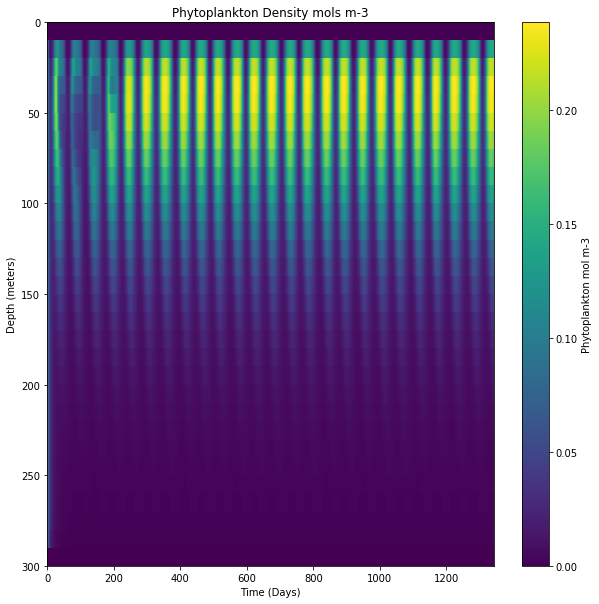

In [3240]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.title('Phytoplankton Density mols m-3')
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

scale_y = param.delta_z()

plt.imshow(omega,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Phytoplankton mol m-3')
#plt.savefig('/users/manasi/Documents/dtu/course_content/fasham_seasonality.png')

In [3233]:
nuts = soln.y[param.n:param.n*2,:]
nuts.shape
#nuts

(30, 1327)

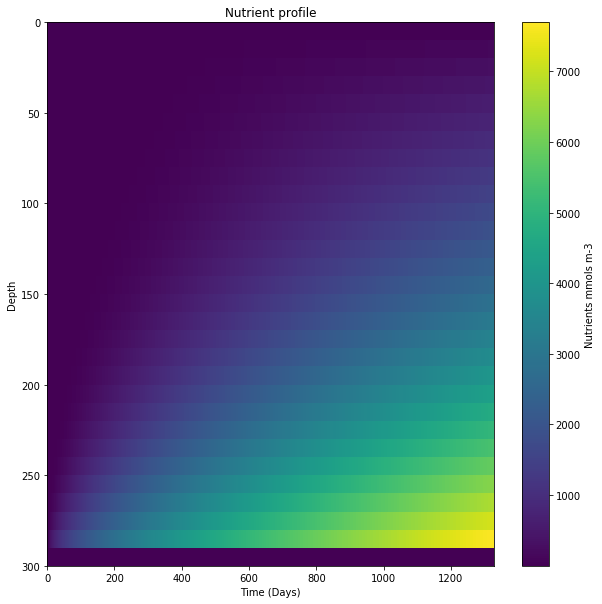

In [3234]:
plt.title('Nutrient profile')
plt.xlabel('Time (Days)')
plt.ylabel('Depth')

scale_y = param.delta_z()

plt.imshow(nuts,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Nutrients mmols m-3')

In [3235]:
dets = soln.y[param.n*2:,:]
dets.shape

(30, 1327)

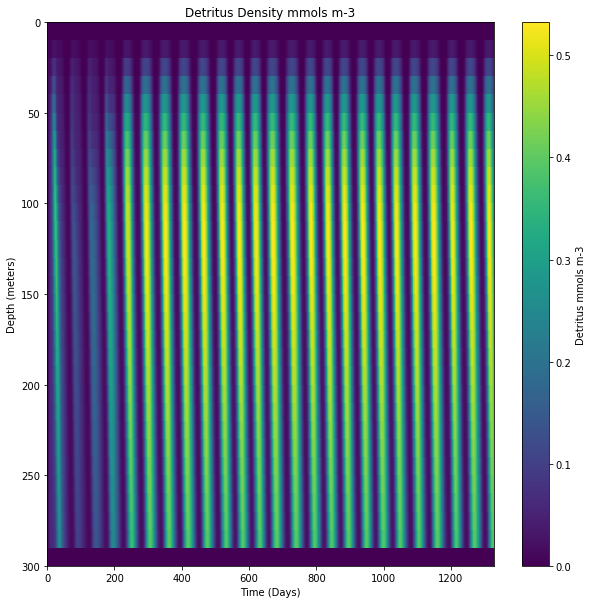

In [3236]:
plt.title('Detritus Density mmols m-3')
plt.xlabel('Time (Days)')
plt.ylabel('Depth (meters)')

scale_y = param.delta_z()

plt.imshow(dets,cmap = 'viridis', aspect = 'auto', extent=[0,omega.shape[1],param.depth,0]) 
cb = plt.colorbar()
cb.set_label('Detritus mmols m-3')